In [58]:
import pandas as pd
import math 

 **The Decision Tree algorithm intuition is as follows:-

#For each attribute in the dataset, the Decision-Tree algorithm forms a node. 
##The most important attribute is placed at the root node.

##For evaluating the task in hand, we start at the root node and 
##we work our way down the tree by following the corresponding node that meets our condition or decision.

##This process continues until a leaf node is reached. 
##It contains the prediction or the outcome of the Decision Tree.

Gini Index:(formula)
    image
    

In [60]:
def gini(samples):
    samples_sum =  sum(samples)
    score = 0
    probas = []
    for samples in samples:
        proba = samples / samples_sum
        probas.append(proba)
    for proba in probas:
        score += proba * (1- proba)
    return score        

Entropy:(fromula)
    image

In [62]:
def entropy(samples):
    samples_sum =  sum(samples)
    score = 0
    probas = []
    for samples in samples:
        proba = samples / samples_sum
        probas.append(proba)
    for proba in probas:
        if proba > 0:
            score += proba * math.log(proba)
    return score *-1

In [63]:
samples =[100, 100, 100]
gini(samples), entropy(samples)

(0.6666666666666667, 1.0986122886681096)

In [64]:
data = pd.read_csv("train.csv") #Titanic dataset from kaggle

In [65]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
data = data[["Survived", "Pclass", "Sex"]]

In [69]:
sex_mapping ={
    "female": 0,
    "male" :1
}
data.Sex = data.Sex.map(sex_mapping)

In [70]:
data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [71]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [72]:
data .Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [73]:
gini([549, 342])

0.4730129578614427

In [74]:
#entropy([549, 342])

 (PCLass<=1.5)

In [75]:
x = data[data.Pclass <=1.5]
print(x.shape)
print(x.Survived.value_counts())

(216, 3)
1    136
0     80
Name: Survived, dtype: int64


In [76]:
gini([80,136]) #for pclass <=1.5

0.4663923182441701

In [77]:
y = data[data.Pclass >1.5]
print(y.shape)
print(y.Survived.value_counts())

(675, 3)
0    469
1    206
Name: Survived, dtype: int64


In [78]:
gini([469,206])  #for pclass >1.5

0.4240943758573388

(PClass<=2.5)

In [79]:
x1 = data[data.Pclass <=2.5]
print(x1.shape)
print(x1.Survived.value_counts())

(400, 3)
1    223
0    177
Name: Survived, dtype: int64


In [80]:
gini([223, 177])

0.4933875

In [81]:
y1 = data[data.Pclass >2.5]
print(y1.shape)
print(y1.Survived.value_counts())

(491, 3)
0    372
1    119
Name: Survived, dtype: int64


In [82]:
gini([372, 119])

0.36724586342349663

(Sex<0.5)

In [83]:
x2 = data[data.Sex <=0.5]
print(x2.shape)
print(x2.Survived.value_counts())

(314, 3)
1    233
0     81
Name: Survived, dtype: int64


In [84]:
gini([233,81])

0.38283500344841576

In [85]:
y2 = data[data.Sex >0.5]
print(y2.shape)
print(y2.Survived.value_counts())

(577, 3)
0    468
1    109
Name: Survived, dtype: int64


In [86]:
gini([468, 109])

0.3064437162277843

In [87]:
p1 = 0.383
p2 = 0.314
s1 = 306
s2 =577
weight_gini=(p1*s1 +p2*s2)/(s1+s2)

In [88]:
#lowest weightest gini becomes the node SEX
#now with pclass condition the
#lower gini value becomes the left child 

In [89]:
x2 = data[(data.Sex <=0.5) &(data.Pclass <=1.5)]
print(x2.shape)
print(x2.Survived.value_counts())
gini([91,3])

(94, 3)
1    91
0     3
Name: Survived, dtype: int64


0.06179266636487097

In [90]:
y2 = data[(data.Sex <=0.5) & (data.Pclass >1.5)]
print(y2.shape)
print(y2.Survived.value_counts())
gini([142, 78])

(220, 3)
1    142
0     78
Name: Survived, dtype: int64


0.45768595041322313

In [91]:
#weighted_gini for node  pclass<=1.5

In [92]:
x2 = data[(data.Sex <=0.5) &(data.Pclass <=2.5)]
print(x2.shape)
print(x2.Survived.value_counts())
gini([161,9])

(170, 3)
1    161
0      9
Name: Survived, dtype: int64


0.10027681660899657

In [93]:
y2 = data[(data.Sex <=0.5) & (data.Pclass >2.5)]
print(y2.shape)
print(y2.Survived.value_counts())
gini([72, 72])

(144, 3)
1    72
0    72
Name: Survived, dtype: int64


0.5

In [94]:
#weighted_gini for node pclass<=2.5

                            (sex<=2.5)
                            /        \
                           /          \
                0.383(81, 233)        0.306(468,109)
                (PClass<=2.5)
                /         \
               /           \
              /             \
           0.1(9, 161)      0.5(72, 72)
          (PClass<=1.5)        (leaf)
            /     \
           /       \
          /         \
                
    

In [95]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [96]:
features = ["Sex", "Pclass"]
model = DecisionTreeClassifier()
model.fit(data[features], data.Survived)

DecisionTreeClassifier()

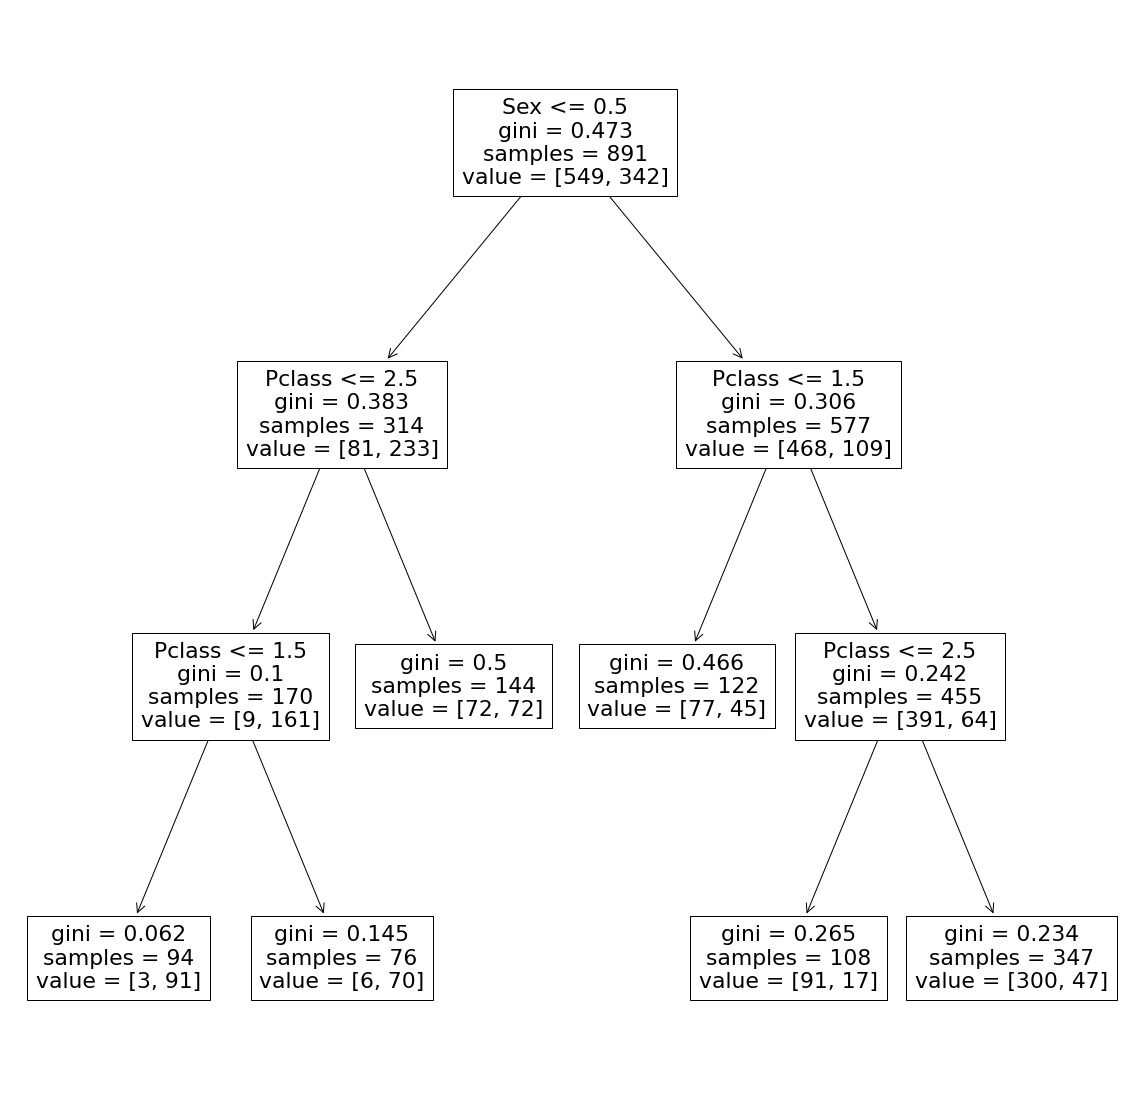

In [97]:
plt.figure(figsize=(20,20))
plot_tree(model, feature_names = features)
plt.show()

In [98]:
#Notes
#more depth sometimes overfit the training dataset
#optimal nodes and depth after that validation data stop reducing
#Squared loss for regression